In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
df = pd.read_csv("../output/exp007/20210407093937/df_val_fold0.csv")

In [4]:
df["label_group"].value_counts()

2994     51
412      51
9370     51
2606     51
4438     46
         ..
6164      2
10258     2
2054      2
5390      2
8180      2
Name: label_group, Length: 5507, dtype: int64

In [5]:
df["phash_size"] = df["image_phash"].map(df["image_phash"].value_counts().to_dict())
df["label_size"] = df["label_group"].map(df["label_group"].value_counts().to_dict())

In [6]:
df[df["label_size"] > 1].sort_values("label_group")

,posting_id,image,image_phash,title,label_group,filepath,pred,target,f1,phash_size,label_size
15720,train_1528423085,eec692257e74fcbc6cb63cb76d0f20e7.jpg,ea97861c926a71e3,WARNA RANDOM ACAK Sarung Celana Wadimor MURAH ...,0,input/shopee-product-matching/train_images\eec...,['train_1646767365' 'train_398181303' 'train_1...,['train_1646767365' 'train_398181303' 'train_1...,1.000000,1,3
1915,train_1646767365,1d7aadc7503b2b4539cc9a5fe41979dd.jpg,e925873ed09cd08f,Sarung celana wadimor original 100% dewasa dan...,0,input/shopee-product-matching/train_images\1d7...,['train_1646767365' 'train_398181303' 'train_1...,['train_1646767365' 'train_398181303' 'train_1...,1.000000,1,3
3379,train_398181303,3301b8aaccea93d1098995ffbc537335.jpg,e9b5833e929e909c,SARUNG CELANA WADIMOR DEWASA HITAM POLOS SARCEL,0,input/shopee-product-matching/train_images\330...,['train_1646767365' 'train_398181303' 'train_1...,['train_1646767365' 'train_398181303' 'train_1...,1.000000,1,3
10839,train_1123490626,a3e83f94822e26ecf236c80d922d6794.jpg,ae3ec26b3b2f3480,LVN Collagen / Stroberi eco 1box (10 sachet),2,input/shopee-product-matching/train_images\a3e...,['train_1123490626' 'train_2419208039' 'train_...,['train_318767180' 'train_3645016213' 'train_7...,0.500000,1,12
7534,train_789743463,726574cf844c5dac0669f926d09c8931.jpg,c634f2e078e2b3cc,TERMURAH LVN COLLAGEN STROBERI 1 BOX 10 SACHET,2,input/shopee-product-matching/train_images\726...,['train_318767180' 'train_3645016213' 'train_7...,['train_318767180' 'train_3645016213' 'train_7...,0.500000,1,12
...,...,...,...,...,...,...,...,...,...,...,...
11860,train_122952880,b37708cc2ff8d5bb0bf872ce8ee51d7c.jpg,ad29e81e92b295b5,kuas roti / kuas oles cake bread / kuas silikon,11010,input/shopee-product-matching/train_images\b37...,['train_2902950555' 'train_1074412229' 'train_...,['train_2681444479' 'train_2904843101' 'train_...,0.458333,12,11
11861,train_4189824924,b37708cc2ff8d5bb0bf872ce8ee51d7c.jpg,ad29e81e92b295b5,kuas silikon/kuas oles roti,11010,input/shopee-product-matching/train_images\b37...,['train_2902950555' 'train_1074412229' 'train_...,['train_2681444479' 'train_2904843101' 'train_...,0.458333,12,11
10081,train_530130322,986be886752cb7692a65b7841d078641.jpg,ad29e81e92b295b5,( RIC ) Kuas Silikon Roti silicone Cake barbec...,11010,input/shopee-product-matching/train_images\986...,['train_2902950555' 'train_1074412229' 'train_...,['train_2681444479' 'train_2904843101' 'train_...,0.440000,12,11
9904,train_3902879615,95eb770da42f2d9d89c374093a5b49ef.jpg,f6768d802b2b74d4,Plextone G20 Gaming Earphone Sport Earphone He...,11012,input/shopee-product-matching/train_images\95e...,['train_3006228291' 'train_3671173710' 'train_...,['train_3671173710' 'train_3902879615'],0.571429,1,2


In [7]:
df.groupby("label_size")["f1"].describe()

,count,mean,std,min,25%,50%,75%,max
label_size,,,,,,,,
2,6980.0,0.800471,0.227201,0.060606,0.666667,1.000000,1.000000,1.000000
3,2661.0,0.777240,0.231274,0.086957,0.545455,0.800000,1.000000,1.000000
4,1812.0,0.800216,0.218400,0.142857,0.666667,0.857143,1.000000,1.000000
5,1185.0,0.796930,0.227612,0.153846,0.666667,0.888889,1.000000,1.000000
6,798.0,0.776946,0.236471,0.117647,0.603846,0.857143,1.000000,1.000000
7,560.0,0.776273,0.224916,0.105263,0.600000,0.833333,0.933333,1.000000
8,448.0,0.819424,0.210787,0.166667,0.758929,0.888889,1.000000,1.000000
9,396.0,0.794671,0.216963,0.117647,0.705882,0.875000,0.947368,1.000000
10,270.0,0.770979,0.231844,0.142857,0.645161,0.869565,0.947368,1.000000


In [87]:
def getMetric(col):
    def f1score(row):
        n = len( np.intersect1d(row.target,row[col]) )
        
        return 2*n / (len(row.target)+len(row[col]))
    return f1score

In [92]:
def get_cv(df, target_col="pred"):
    tmp = df.groupby('label_group').posting_id.agg('unique').to_dict()
    df['target'] = df.label_group.map(tmp)
    df[f'f1_{target_col}'] = df.apply(getMetric(target_col),axis=1)
    return df[f"f1_{target_col}"].mean()

In [10]:
df["pred"] = [x.replace("'", "").replace("[", "").replace("]", "").replace("\n", "").split(" ") for x in df["pred"].values]
df["target"] = [x.replace("'", "").replace("[", "").replace("]", "").replace("\n", "").split(" ") for x in df["target"].values]

In [54]:
get_cv(df.copy())

0.7887274156815943

In [40]:
def join_pred(series):
    ret = series.sum()
    ret = list(set(ret))
    ret.sort()
    return [ret] * len(series)

In [81]:
df["pred"] = [list(np.sort(np.array(x))) for x in df["pred"].values]
df["pred_phash_sum"] = df.groupby("image_phash")["pred"].transform(join_pred)

In [82]:
get_cv(df.copy(), target_col="pred_phash_sum")

0.7875832189129583

In [56]:
df["pred_len"] = [len(x) for x in df["pred"].values]

In [62]:
df[df["phash_size"] > df["pred_len"]]

,posting_id,image,image_phash,title,label_group,filepath,pred,target,f1,phash_size,label_size,pred_phash_sum,pred_len
6703,train_415825584,654a6848f233c0d2a2102c3a2ebea69d.jpg,e699996699669926,Botol Saus/Kecap Bruno Sauce Keeper 550 ml TS-55,540,input/shopee-product-matching/train_images\654...,"[train_2757428531, train_415825584]","[train_2757428531, train_415825584]",1.000000,3,2,"[train_1029471304, train_2095256261, train_251...",2
7655,train_556785717,742abbdf8e599ec55185a83258bd2c50.jpg,e3e0d6add83c48a5,Casing Bahan Tpu Untuk Iphone X Xs Max Iphone ...,5804,input/shopee-product-matching/train_images\742...,[train_556785717],"[train_1881952216, train_556785717]",0.666667,2,2,"[train_1388735077, train_1547719442, train_159...",1
16276,train_4046839048,f745b154a319f63de14128ea8566c6c9.jpg,eee297ab4a98894c,XIJING-COD Fashion Woman Stainless Steel Strap...,8402,input/shopee-product-matching/train_images\f74...,"[train_3362629193, train_4046839048]","[train_2565322338, train_1383091248, train_194...",0.333333,3,4,"[train_1383091248, train_1946142160, train_256...",2


In [70]:
df[df["image_phash"] == "e699996699669926"]

,posting_id,image,image_phash,title,label_group,filepath,pred,target,f1,phash_size,label_size,pred_phash_sum,pred_len
3675,train_1029471304,37586b8e11bf3a2770d65b55f74f34cc.jpg,e699996699669926,Rak Sepatu Gantung karakter,1616,input/shopee-product-matching/train_images\375...,"[train_1029471304, train_2095256261, train_251...","[train_1029471304, train_2095256261, train_255...",0.800000,3,4,"[train_1029471304, train_2095256261, train_251...",6
6703,train_415825584,654a6848f233c0d2a2102c3a2ebea69d.jpg,e699996699669926,Botol Saus/Kecap Bruno Sauce Keeper 550 ml TS-55,540,input/shopee-product-matching/train_images\654...,"[train_2757428531, train_415825584]","[train_2757428531, train_415825584]",1.000000,3,2,"[train_1029471304, train_2095256261, train_251...",2
7493,train_2095256261,71ebb79d3fdf244d45a6647b526eed81.jpg,e699996699669926,Rak sepatu karakter 9 susun,1616,input/shopee-product-matching/train_images\71e...,"[train_1029471304, train_2095256261, train_255...","[train_1029471304, train_2095256261, train_255...",0.888889,3,4,"[train_1029471304, train_2095256261, train_251...",5


(640, 640, 3)


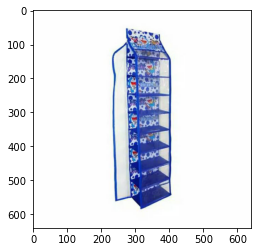

(632, 632, 3)


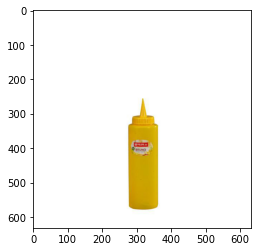

(380, 380, 3)


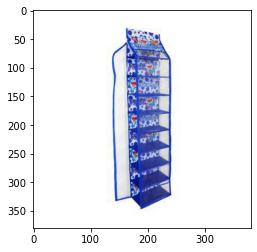

In [75]:
for img in df[df["image_phash"] == "e699996699669926"]["image"].values:
    im = Image.open(f"../input/shopee-product-matching/train_images/{img}")
    plt.imshow(im)
    plt.show()

In [83]:
df["title_lower"] = [x.lower() for x in df["title"].values]
df["pred_title_sum"] = df.groupby("title_lower")["pred"].transform(join_pred)

In [93]:
get_cv(df, target_col="pred_title_sum")

0.7907861164405063

In [94]:
df["diff_f1_title"] = df["f1_pred_title_sum"] - df["f1"]
df[df["pred"] != df["pred_title_sum"]]["diff_f1_title"].describe()

count    472.000000
mean       0.073568
std        0.227993
min       -0.885714
25%       -0.069940
50%        0.058187
75%        0.200000
max        0.777778
Name: diff_f1_title, dtype: float64

In [106]:
df

,posting_id,image,image_phash,title,label_group,filepath,pred,target,f1,phash_size,label_size,pred_phash_sum,pred_len,title_lower,pred_title_sum,f1_pred_title_sum,diff_f1_title
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,666,input/shopee-product-matching/train_images\000...,[train_129225211],"[train_129225211, train_2278313361]",0.666667,1,2,[train_129225211],1,paper bag victoria secret,"[train_129225211, train_2278313361]",1.000000,0.333333
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",7572,input/shopee-product-matching/train_images\000...,"[train_3386243561, train_3423213080]","[train_3386243561, train_3423213080]",1.000000,1,2,"[train_3386243561, train_3423213080]",2,"double tape 3m vhb 12 mm x 4,5 m original / do...","[train_3386243561, train_3423213080]",1.000000,0.000000
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,6172,input/shopee-product-matching/train_images\000...,[train_2288590299],"[train_2288590299, train_3803689425]",0.666667,1,2,[train_2288590299],1,maling tts canned pork luncheon meat 397 gr,[train_2288590299],0.666667,0.000000
3,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,CELANA WANITA (BB 45-84 KG)Harem wanita (bisa...,6836,input/shopee-product-matching/train_images\001...,"[train_2464356923, train_2753295474]","[train_2464356923, train_2753295474, train_305...",0.800000,2,3,"[train_2464356923, train_2753295474]",2,celana wanita (bb 45-84 kg)harem wanita (bisa...,"[train_2464356923, train_2753295474]",0.800000,0.000000
4,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...,3976,input/shopee-product-matching/train_images\001...,[train_1806152124],"[train_1806152124, train_3227306976]",0.666667,1,2,[train_1806152124],1,kulot plisket salur /candy plisket /wish kulot...,[train_1806152124],0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16862,train_1896175606,ffeaf56f2aacd4fb7a6510e2a1ba6d44.jpg,b258cda7227b624d,Kepala Sower Mandi Aerator Air Soft Halus Lemb...,340,input/shopee-product-matching/train_images\ffe...,"[train_1896175606, train_943848845]","[train_943848845, train_1896175606]",1.000000,1,2,"[train_1896175606, train_943848845]",2,kepala sower mandi aerator air soft halus lemb...,"[train_1896175606, train_943848845]",1.000000,0.000000
16863,train_3445757395,ffec72f12011f37a8ade8fc5ec3a571c.jpg,ab37362b173630aa,Johnson\xe2\x80\x99s Top to Toe Hair & Body Ba...,9200,input/shopee-product-matching/train_images\ffe...,"[train_1168659202, train_3445757395, train_348...","[train_4075151362, train_3445757395, train_348...",0.857143,2,3,"[train_1168659202, train_3445757395, train_348...",4,johnson\xe2\x80\x99s top to toe hair & body ba...,"[train_1168659202, train_3445757395, train_348...",0.857143,0.000000
16864,train_3480437118,ffec72f12011f37a8ade8fc5ec3a571c.jpg,ab37362b173630aa,Johnson\xe2\x80\x99s Top to Toe Hair & Body Ba...,9200,input/shopee-product-matching/train_images\ffe...,"[train_1168659202, train_3445757395, train_348...","[train_4075151362, train_3445757395, train_348...",0.750000,2,3,"[train_1168659202, train_3445757395, train_348...",5,johnson\xe2\x80\x99s top to toe hair & body ba...,"[train_1168659202, train_3445757395, train_348...",0.750000,0.000000
16865,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,7038,input/shopee-product-matching/train_images\fff...,"[train_1463059254, train_1626889862, train_184...","[train_1463059254, train_769054909]",0.222222,1,2,"[train_1463059254, train_1626889862, train_184...",16,mamypoko pants royal soft - s 70 - popok celana,"[train_1463059254, train_1626889862, train_184...",0.222222,0.000000


In [117]:
df[df["pred"] != df["pred_title_sum"]].sort_values("diff_f1_title")

,posting_id,image,image_phash,title,label_group,filepath,pred,target,f1,phash_size,label_size,pred_phash_sum,pred_len,title_lower,pred_title_sum,f1_pred_title_sum,diff_f1_title
8224,train_2514122916,7d109a5c2d9caa09e6bc71c35f9ac830.jpg,ff5f84e0709ce260,BUBBLE WRAP,660,input/shopee-product-matching/train_images\7d1...,"[train_2514122916, train_3052078048]","[train_3052078048, train_2514122916]",1.000000,2,2,"[train_2514122916, train_3052078048]",2,bubble wrap,"[train_1010043803, train_1032986852, train_106...",0.114286,-0.885714
11648,train_3254066288,b07060abba1b54d61337294d0fbcf640.jpg,b98d4d8d389933c6,Passive splitter / pasif spliter 1:2 fiber optic,6512,input/shopee-product-matching/train_images\b07...,"[train_3254066288, train_3701332589]","[train_3701332589, train_3254066288]",1.000000,1,2,"[train_3254066288, train_3701332589]",2,passive splitter / pasif spliter 1:2 fiber optic,"[train_1218378310, train_1526015275, train_276...",0.444444,-0.555556
8570,train_3932894475,81ba14f7a9cb3c410a1ba8b393daa0da.jpg,a7523b24b059c7da,Tutup Pentil Ban Roda Lampu Led Motor Mobil Se...,6562,input/shopee-product-matching/train_images\81b...,[train_3932894475],"[train_1436686124, train_3932894475]",0.666667,1,2,[train_3932894475],1,tutup pentil ban roda lampu led motor mobil se...,"[train_1146285530, train_1345649171, train_136...",0.117647,-0.549020
3793,train_3340905435,38dff89c039b7915b4200c845d2b9457.jpg,f5d1d2e16c0c93c9,Xiaomi 100persen Original Headset Xiaomi Pisto...,4060,input/shopee-product-matching/train_images\38d...,"[train_1049431051, train_2566437159, train_334...","[train_3340905435, train_1049431051]",0.800000,1,2,"[train_1049431051, train_2566437159, train_334...",3,xiaomi 100persen original headset xiaomi pisto...,"[train_1049431051, train_1429319973, train_170...",0.285714,-0.514286
4224,train_3168947168,3f091283b1a1a1b0c0be6458bfd97a8c.jpg,999d794b627b1a09,Kuas Masker,3918,input/shopee-product-matching/train_images\3f0...,"[train_1341388284, train_1724283836, train_316...","[train_1341388284, train_3168947168]",0.666667,2,2,"[train_1341388284, train_1724283836, train_316...",4,kuas masker,"[train_1273135306, train_1281622527, train_134...",0.181818,-0.484848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10261,train_4065978979,9b2ea34a22b56f63a265ccece26fafca.jpg,edac2c1e86a72363,Wedges spon silang,5164,input/shopee-product-matching/train_images\9b2...,[train_4065978979],"[train_4263542341, train_699071917, train_1270...",0.250000,1,7,[train_4065978979],1,wedges spon silang,"[train_127044824, train_1318281105, train_3486...",0.923077,0.673077
636,train_3816117410,09e8f5b827cb73c82a94334ff1729c4d.jpg,d52f8edb9a3988c0,Jilbab Instan Khimar Pet Gerigi - Kerudung Wanita,10476,input/shopee-product-matching/train_images\09e...,[train_3816117410],"[train_1305850588, train_3816117410, train_190...",0.250000,1,7,[train_3816117410],1,jilbab instan khimar pet gerigi - kerudung wanita,"[train_1305850588, train_1791162909, train_190...",1.000000,0.750000
14198,train_3950993681,d76df91141373b056d3faed45b3264df.jpg,e11e0f753ef09087,Speaker Bluetooth Robot RB420 Portable Wireles...,9954,input/shopee-product-matching/train_images\d76...,"[train_1082842942, train_1388735077, train_154...","[train_935224973, train_2804745276, train_2263...",0.055556,1,25,"[train_1082842942, train_1388735077, train_154...",11,speaker bluetooth robot rb420 portable wireles...,"[train_1082842942, train_1388735077, train_154...",0.813559,0.758004
10180,train_2834390170,99eb0bca881d7080a7ecf1f37b2f7336.jpg,c0d2bf2dbd244396,Tutup Pentil LED / Pentil Ban LED ban motor mo...,4004,input/shopee-product-matching/train_images\99e...,"[train_2442928452, train_2834390170, train_387...","[train_2442928452, train_1146285530, train_187...",0.210526,1,34,"[train_2442928452, train_2834390170, train_387...",4,tutup pentil led / pentil ban led ban motor mo...,"[train_1146285530, train_1345649171, train_136...",0.970588,0.760062


In [103]:
df[df["pred"] != df["pred_title_sum"]].sort_values("diff_f1_title").iloc[0]["pred"]

['train_2514122916', 'train_3052078048']

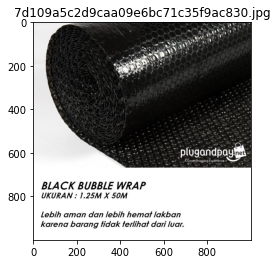

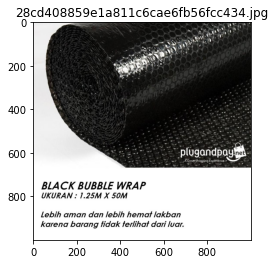

In [113]:
for img in df[df["pred"] != df["pred_title_sum"]].sort_values("diff_f1_title").iloc[0]["pred"]:
    img = df[df["posting_id"] == img]["image"].values[0]
    im = Image.open(f"../input/shopee-product-matching/train_images/{img}")
    plt.imshow(im)
    plt.title(img)
    plt.show()

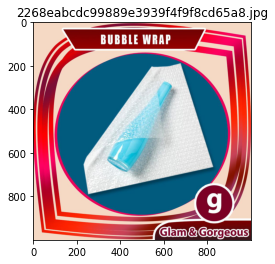

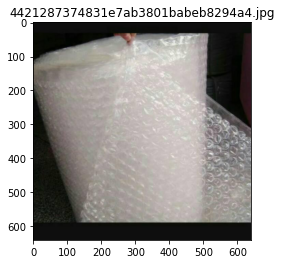

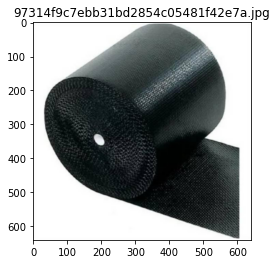

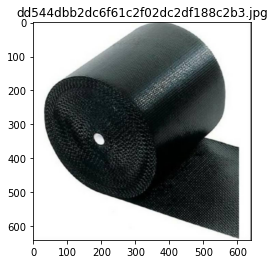

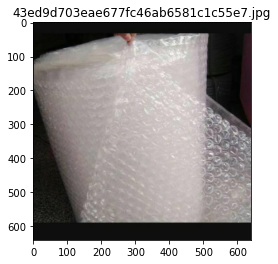

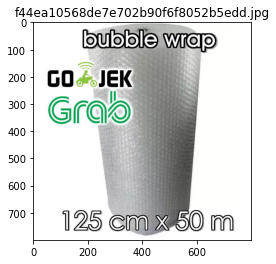

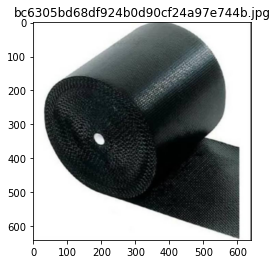

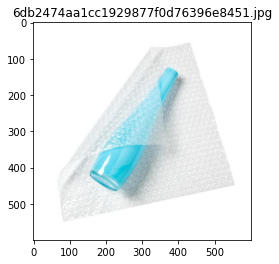

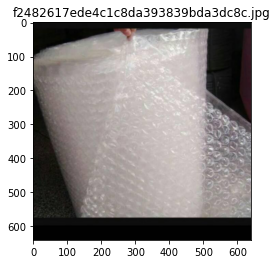

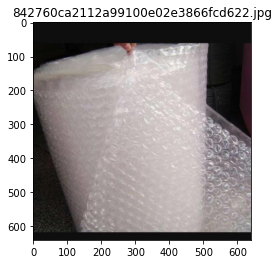

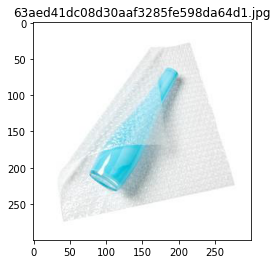

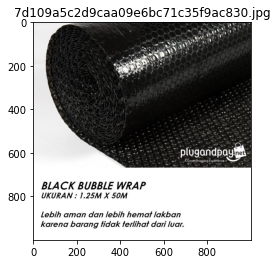

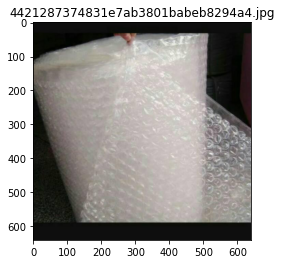

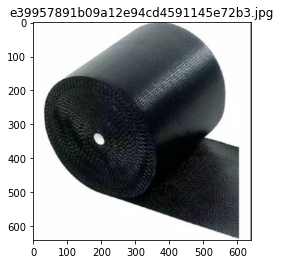

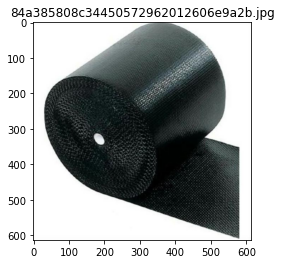

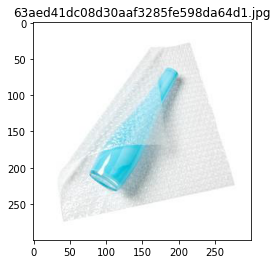

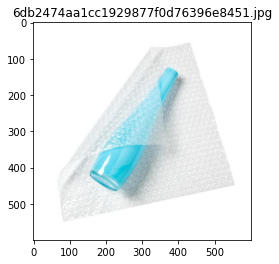

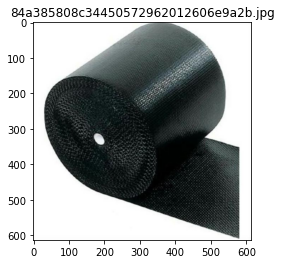

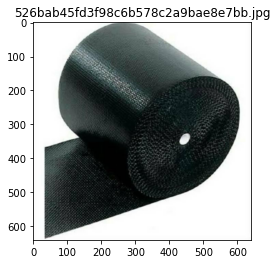

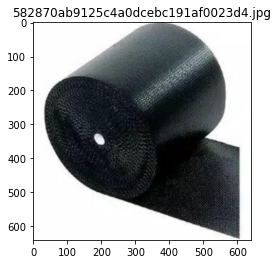

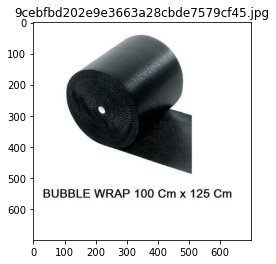

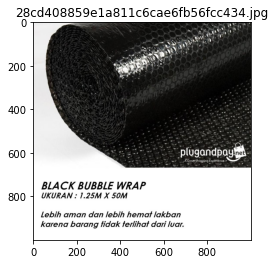

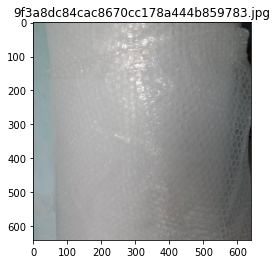

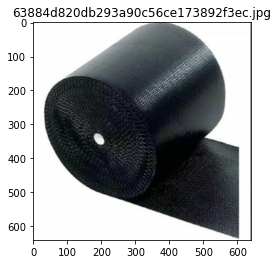

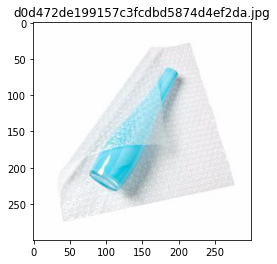

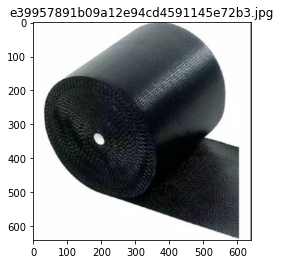

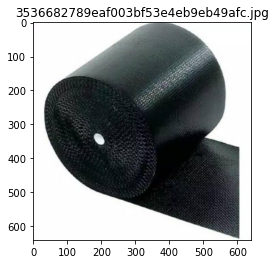

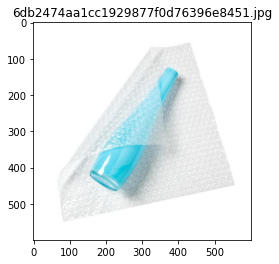

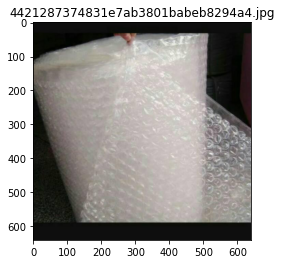

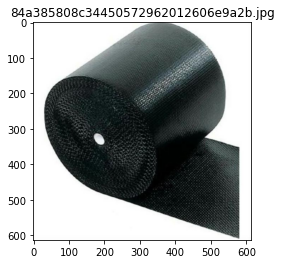

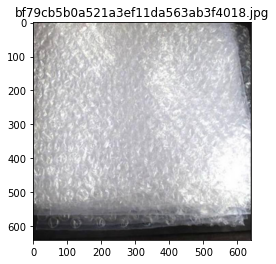

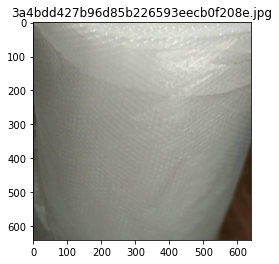

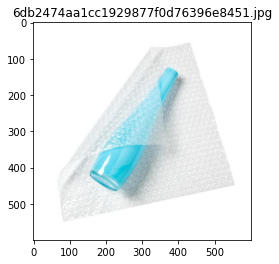

In [114]:
for img in df[df["pred"] != df["pred_title_sum"]].sort_values("diff_f1_title").iloc[0]["pred_title_sum"]:
    img = df[df["posting_id"] == img]["image"].values[0]
    im = Image.open(f"../input/shopee-product-matching/train_images/{img}")
    plt.imshow(im)
    plt.title(img)
    plt.show()

In [119]:
df["pred_title_normal_sum"] = df.groupby("title")["pred"].transform(join_pred)

In [121]:
get_cv(df, target_col="pred_title_normal_sum")

0.7902107494433519